In [527]:
import pandas as pd

In [528]:
path_data = "..\\data\\NOMAL.xlsx"
df = pd.read_excel(path_data)

In [529]:
df.head(5)

,Codice identificativo:,Sesso,Nazionalità,Età,Domicilio,Comorbilità,Diabete,HIV,Cirrosi,IRC,...,Trasfusione:,Unità trasfuse,Altri eventi avversi,Diarrea e disidratazione,Ipertransaminasemia tardiva,Polmonite,IVU nosocomiale,Esofagite,Dispepsia,Tachiaritmia sopraventricolare
0,3761,1,1,57,0.0,0,0,0,0,0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35319,0,0,62,0.0,0,0,0,0,0,...,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BS01,1,0,72,0.0,1,0,0,0,0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BS-004,1,0,53,0.0,1,1,0,0,0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BS-005,0,1,58,0.0,0,0,0,0,0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [530]:
from sklearn.decomposition import PCA

# Assuming your dataframe is stored in a variable called 'df'
# Extract the feature columns from the dataframe
features = df.drop(['ICU','Codice identificativo:'], axis=1)

# Extract the target variable
target = df['ICU']

# Instantiate the PCA object and specify the number of components
pca = PCA(n_components=2)

In [531]:
target

0     0
1     0
2     0
3     0
4     0
     ..
67    0
68    0
69    0
70    0
71    0
Name: ICU, Length: 72, dtype: int64

In [532]:
features.head(5)

,Sesso,Nazionalità,Età,Domicilio,Comorbilità,Diabete,HIV,Cirrosi,IRC,Ritardo terapeutico,...,Trasfusione:,Unità trasfuse,Altri eventi avversi,Diarrea e disidratazione,Ipertransaminasemia tardiva,Polmonite,IVU nosocomiale,Esofagite,Dispepsia,Tachiaritmia sopraventricolare
0,1,1,57,0.0,0,0,0,0,0,7.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,62,0.0,0,0,0,0,0,7.0,...,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,72,0.0,1,0,0,0,0,2.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,53,0.0,1,1,0,0,0,7.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,58,0.0,0,0,0,0,0,7.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [533]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
features = pd.DataFrame(imputer.fit_transform(features))#, columns=features.columns)

In [534]:
# Apply PCA to the feature data
principal_components = pca.fit_transform(features)

# Create a new dataframe with the selected principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the target variable column to the new dataframe
df_pca['target'] = target


In [535]:
df_pca.head(5)

,PC1,PC2,target
0,-4.094489e+05,26871.745094,0
1,-1.179996e+06,-97429.387658,0
2,7.900868e+05,-135052.326760,0
3,-9.675726e+05,449517.408450,0
4,3.797759e+06,460925.078578,0


In [536]:
import matplotlib.pyplot as plt

# Assuming your 2D vectors are stored in a variable called 'vectors'
# Assuming your labels are stored in a variable called 'labels'

# Separate the vectors based on the labels
label_0_vectors = df_pca[target == 0]
label_1_vectors = df_pca[target == 1]


In [537]:
label_0_vectors.head(5)

,PC1,PC2,target
0,-4.094489e+05,26871.745094,0
1,-1.179996e+06,-97429.387658,0
2,7.900868e+05,-135052.326760,0
3,-9.675726e+05,449517.408450,0
4,3.797759e+06,460925.078578,0


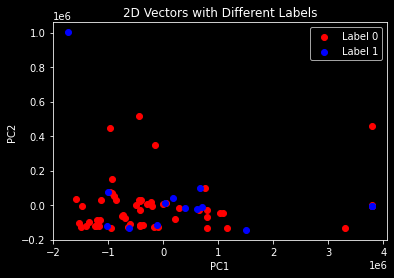

In [538]:

# Plot the vectors with different colors for different labels
plt.scatter(label_0_vectors['PC1'], label_0_vectors['PC2'], c='red', label='Label 0')
plt.scatter(label_1_vectors['PC1'], label_1_vectors['PC2'], c='blue', label='Label 1')

# Set labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Vectors with Different Labels')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [539]:
import numpy as np

In [540]:

log_label_0_vectors = pd.DataFrame()
log_label_0_vectors['PC1'] = np.sign(label_0_vectors['PC1']) * np.log(np.abs(label_0_vectors['PC1']))
log_label_0_vectors['PC2'] = np.sign(label_0_vectors['PC2']) * np.log(np.abs(label_0_vectors['PC2']))
log_label_0_vectors['target'] = label_0_vectors['target']


log_label_1_vectors = pd.DataFrame()
log_label_1_vectors['PC1'] = np.sign(label_1_vectors['PC1']) * np.log(np.abs(label_1_vectors['PC1']))
log_label_1_vectors['PC2'] = np.sign(label_1_vectors['PC2']) * np.log(np.abs(label_1_vectors['PC2']))
log_label_1_vectors['target'] = label_1_vectors['target']

In [541]:
log_label_0_vectors.head(5)

,PC1,PC2,target
0,-12.922568,10.198831,0
1,-13.981021,-11.486883,0
2,13.579898,-11.813418,0
3,-13.782546,13.015930,0
4,15.149922,13.040991,0


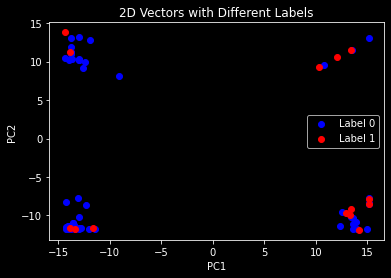

In [542]:

# Plot the vectors with different colors for different labels
plt.scatter(log_label_0_vectors['PC1'], log_label_0_vectors['PC2'], c='blue', label='Label 0')
plt.scatter(log_label_1_vectors['PC1'], log_label_1_vectors['PC2'], c='red', label='Label 1')

# Set labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Vectors with Different Labels')

# Add legend
plt.legend()

# Show the plot
plt.show()


Applying DBSCAN

In [543]:
# Merging the data

merged_df = pd.concat([log_label_0_vectors, log_label_1_vectors], ignore_index=True)
merged_df.head(5)

,PC1,PC2,target
0,-12.922568,10.198831,0
1,-13.981021,-11.486883,0
2,13.579898,-11.813418,0
3,-13.782546,13.015930,0
4,15.149922,13.040991,0


In [544]:
merged_df.tail(5)

,PC1,PC2,target
67,12.901637,-9.624441,1
68,-11.604872,-11.674289,1
69,-14.367059,13.817084,1
70,14.227124,-11.876338,1
71,12.050029,10.598739,1


In [545]:
from sklearn.cluster import DBSCAN

# Assuming merged_df is your merged dataframe

# Selecting the features to be used for clustering
features = ['PC1', 'PC2']

# Creating a subset of the dataframe with only the selected features
data = merged_df[features]

# Creating an instance of DBSCAN with specified parameters
eps = 3  # The maximum distance between samples for them to be considered in the same neighborhood
min_samples = 3  # The minimum number of samples in a neighborhood for a point to be considered a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fitting DBSCAN to the data
clusters = dbscan.fit_predict(data)

# Adding the 'cluster' column to the merged dataframe
merged_df['cluster'] = clusters


In [546]:
merged_df

,PC1,PC2,target,cluster
0,-12.922568,10.198831,0,0
1,-13.981021,-11.486883,0,1
2,13.579898,-11.813418,0,2
3,-13.782546,13.015930,0,0
4,15.149922,13.040991,0,3
...,...,...,...,...
67,12.901637,-9.624441,1,2
68,-11.604872,-11.674289,1,1
69,-14.367059,13.817084,1,0
70,14.227124,-11.876338,1,2


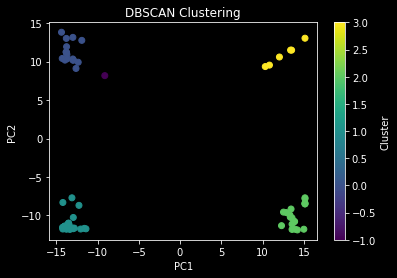

In [547]:
import matplotlib.pyplot as plt

# Assuming merged_df is your merged dataframe with the 'cluster' column

# Creating a scatter plot of the data points with different colors for each cluster
plt.scatter(merged_df['PC1'], merged_df['PC2'], c=merged_df['cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()


Calculating the entropy of the clusters

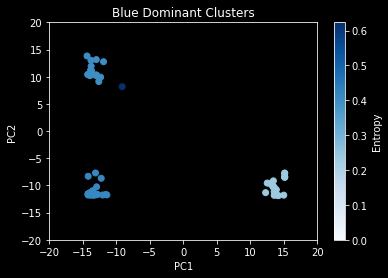

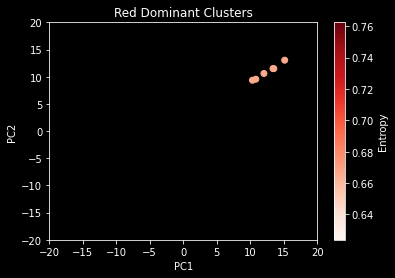

In [548]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Assuming merged_df is your merged dataframe with 'cluster' and 'target' columns

# Calculate the entropy for each cluster
entropy_per_cluster = merged_df.groupby('cluster')['target'].apply(lambda x: entropy(np.bincount(x)))

# Add the 'entropy' feature to the merged_df dataframe
merged_df['entropy'] = merged_df['cluster'].map(entropy_per_cluster)

# Set the background color to black
plt.style.use('dark_background')

# Create separate dataframes for each cluster
cluster_dataframes = [group for _, group in merged_df.groupby('cluster')]

# Check if blue dominant clusters exist
blue_dominant_clusters = [df for df in cluster_dataframes if (df['target'] == 0).sum() > (df['target'] == 1).sum()]
if blue_dominant_clusters:
    # Create a blue-dominant dataframe by concatenating all blue dominant clusters
    blue_dominant_df = pd.concat(blue_dominant_clusters, ignore_index=True)

    # Create a colormap that goes from strong blue to white for blue dominant clusters
    blue_cmap = plt.cm.get_cmap('Blues')

    # Create a scatter plot for blue dominant clusters
    plt.scatter(blue_dominant_df['PC1'], blue_dominant_df['PC2'], c=1-blue_dominant_df['entropy'], cmap=blue_cmap,vmax=1,vmin=0)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.xlim(-20,20)
    plt.ylim(-20,20)
    plt.title('Blue Dominant Clusters')

    # Create a colorbar for the entropy values
    sm = ScalarMappable(cmap=blue_cmap)
    sm.set_array(blue_dominant_df['entropy'])
    plt.colorbar(sm, label='Entropy')

    plt.show()
else:
    print("No blue-dominant clusters found.")

# Check if red dominant clusters exist
red_dominant_clusters = [df for df in cluster_dataframes if (df['target'] == 1).sum() >= (df['target'] == 0).sum()]
if red_dominant_clusters:
    # Create a red-dominant dataframe by concatenating all red dominant clusters
    red_dominant_df = pd.concat(red_dominant_clusters, ignore_index=True)

    # Create a colormap that goes from white to strong red for red dominant clusters
    red_cmap = plt.cm.get_cmap('Reds')

    # Create a scatter plot for red dominant clusters
    plt.scatter(red_dominant_df['PC1'], red_dominant_df['PC2'], c=1-red_dominant_df['entropy'], cmap=red_cmap, vmax=1,vmin=0)
    plt.xlim(-20,20)
    plt.ylim(-20,20)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Red Dominant Clusters')

    # Create a colorbar for the entropy values
    sm = ScalarMappable(cmap=red_cmap)
    sm.set_array(red_dominant_df['entropy'])
    plt.colorbar(sm, label='Entropy')

    plt.show()
else:
    print("No red-dominant clusters found.")


In [551]:
red_dominant_df

# This cluster has entropy != 1 because of class imbalance

,PC1,PC2,target,cluster,entropy
0,15.149922,13.040991,0,3,0.693147
1,13.529622,11.489971,0,3,0.693147
2,10.840282,9.546560,0,3,0.693147
3,13.403363,11.496576,1,3,0.693147
4,10.336350,9.357158,1,3,0.693147
5,12.050029,10.598739,1,3,0.693147
